# Decision Tree and Random Forest
In this notebook, we will perform decision tree and random forest and then evaluate the model's performance.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc, precision_recall_curve, PrecisionRecallDisplay, f1_score


## Load the data

In [40]:
train_data = pd.read_csv('../data/train.csv')
val_data = pd.read_csv('../data/val.csv')
test_data = pd.read_csv('../data/test.csv')

In [41]:
X_train = train_data.drop(labels = ['diagnosis','id'],axis = 1) # drop labels and less predictive features for feature matrix
y_train = train_data['diagnosis']
X_val = val_data.drop(labels = ['diagnosis','id'],axis = 1)
y_val = val_data['diagnosis']
X_test = test_data.drop(labels = ['diagnosis','id'],axis = 1)
y_test = test_data['diagnosis']

## Decision Tree

### Set Model

In [42]:
# function to fit Decision Tree model
def decision_tree(X_train, y_train, seed_value = 10):
    # set random seed
    np.random.seed(seed_value)
    # set the model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    # predict the values for the training and validation sets
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    return model, y_pred_train, y_pred_val

In [43]:
# set the model and get the prediction
model_dt, y_pred_train_dt, y_pred_val_dt = decision_tree(X_train, y_train)

### Metrics

#### Accuracy

In [44]:
# accuracy of decision tree model
dt_score = model_dt.score(X_val, y_val)
print("Decision Tree Model Accuracy: ", dt_score)

Decision Tree Model Accuracy:  0.9381443298969072


#### Confusion Matrix

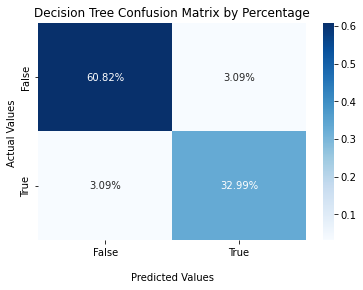

<Figure size 432x288 with 0 Axes>

In [45]:
#Decision Tree Confusion Matrix

cf_matrix_dt = confusion_matrix(y_val, y_pred_val_dt)

ax2 = sns.heatmap(cf_matrix_dt/np.sum(cf_matrix_dt), annot=True, 
            fmt='.2%', cmap='Blues')

ax2.set_title('Decision Tree Confusion Matrix by Percentage');
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values ');

ax2.xaxis.set_ticklabels(['False','True'])
ax2.yaxis.set_ticklabels(['False','True'])

plt.show()
plt.savefig('../figures/confusion_matrix_dt.png')

#### ROC Curve

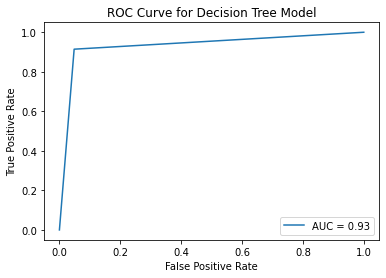

<Figure size 432x288 with 0 Axes>

In [46]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val_dt)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.title("ROC Curve for Decision Tree Model")
plt.show()
plt.savefig('../figures/roc_curve_dt.png');

#### Precision Recall Curve 

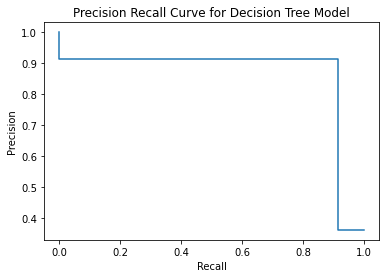

<Figure size 432x288 with 0 Axes>

In [47]:
precision, recall, _ = precision_recall_curve(y_val, y_pred_val_dt)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision Recall Curve for Decision Tree Model")
plt.show()
plt.savefig('../figures/precision_recall_curve_dt.png');

#### F1 Score

In [48]:
f1_score_dt = f1_score(y_val, y_pred_val_dt)
f1_score_dt

0.9142857142857143

## Random Forest

### Set Model

In [10]:
# function to fit Decision Tree model
def random_forest(X_train, y_train, max_feature, seed_value = 10):
    # set random seed
    np.random.seed(seed_value)
    # set the model
    model = RandomForestClassifier(max_features = max_feature)
    model.fit(X_train, y_train)
    # predict the values for the training and validation sets
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    return model, y_pred_train, y_pred_val

In [36]:
# set the model and get the prediction
model_rf, y_pred_train_rf, y_pred_val_rf = random_forest(X_train, y_train, 5)

### Metrics

#### Accuracy

In [37]:
# accuracy of decision tree model
rf_score = model_rf.score(X_val, y_val)
print("Random Forest Model Accuracy: ", rf_score)

Random Forest Model Accuracy:  0.9587628865979382


#### Confusion Matrix

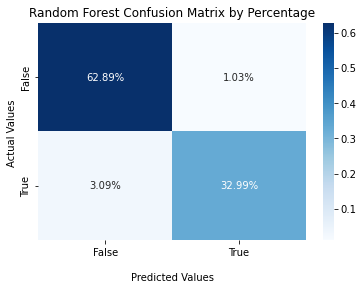

<Figure size 432x288 with 0 Axes>

In [13]:
#Decision Tree Confusion Matrix

cf_matrix_rf = confusion_matrix(y_val, y_pred_val_rf)

ax2 = sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, 
            fmt='.2%', cmap='Blues')

ax2.set_title('Random Forest Confusion Matrix by Percentage');
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values ');

ax2.xaxis.set_ticklabels(['False','True'])
ax2.yaxis.set_ticklabels(['False','True'])

plt.show()
plt.savefig('../figures/confusion_matrix_rf.png')

#### ROC Curve

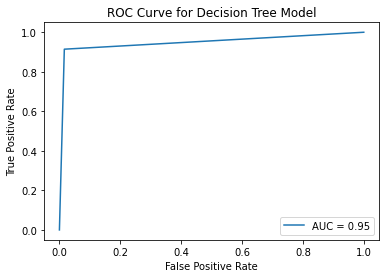

<Figure size 432x288 with 0 Axes>

In [14]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val_rf)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.title("ROC Curve for Decision Tree Model")
plt.show()
plt.savefig('../figures/roc_curve_rf.png');

#### Precision Recall Curve 

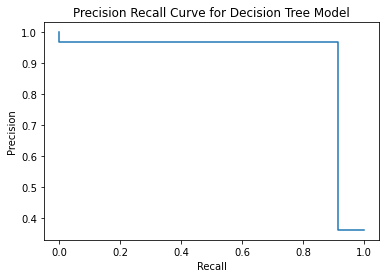

<Figure size 432x288 with 0 Axes>

In [15]:
precision, recall, _ = precision_recall_curve(y_val, y_pred_val_rf)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision Recall Curve for Decision Tree Model")
plt.show()
plt.savefig('../figures/precision_recall_curve_rf.png');

#### F1 Score

In [49]:
f1_score_rf = f1_score(y_val, y_pred_val_rf)
f1_score_rf

0.9411764705882354